<a href="https://colab.research.google.com/github/taraudani/clustering-FORK/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

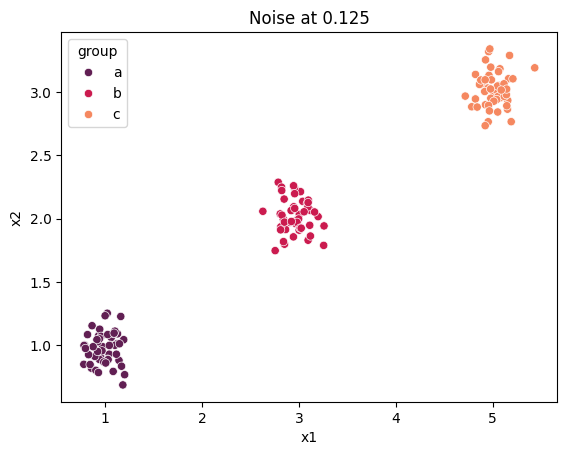

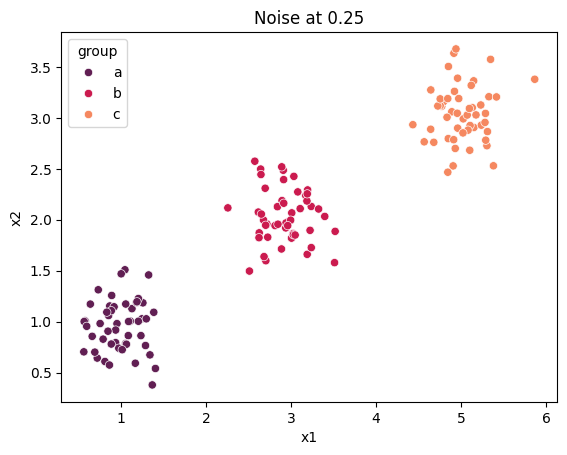

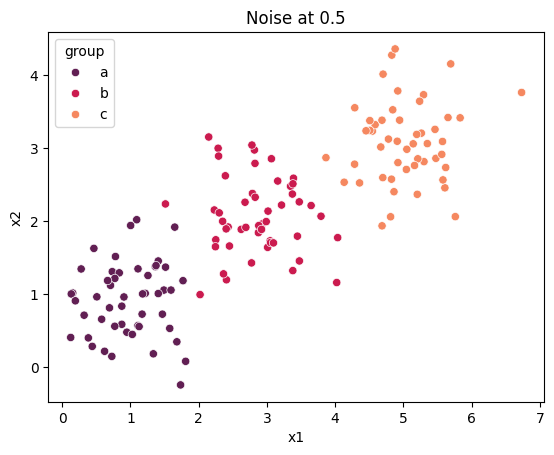

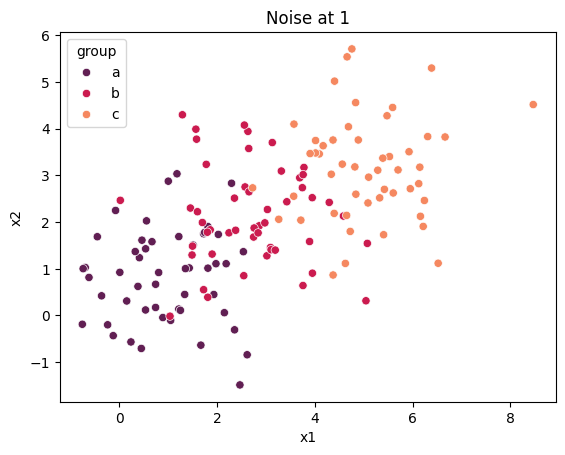

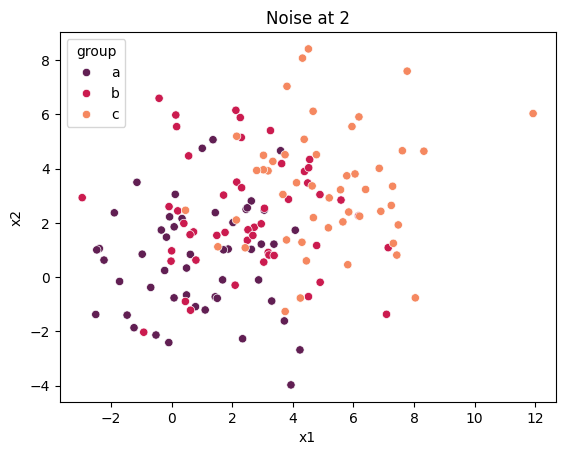

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df0_125, x= 'x1', y= 'x2', hue = 'group', palette = 'rocket')
plt.title('Noise at 0.125')
plt.show()
sns.scatterplot(data = df0_25, x= 'x1', y= 'x2', hue = 'group', palette = 'rocket')
plt.title('Noise at 0.25')
plt.show()
sns.scatterplot(data = df0_5, x= 'x1', y= 'x2', hue = 'group', palette = 'rocket')
plt.title('Noise at 0.5')
plt.show()
sns.scatterplot(data = df1_0, x= 'x1', y= 'x2', hue = 'group', palette = 'rocket')
plt.title('Noise at 1')
plt.show()
sns.scatterplot(data = df2_0, x= 'x1', y= 'x2', hue = 'group', palette = 'rocket')
plt.title('Noise at 2')
plt.show()

#as the noise increases, the visual distinctness of the clusters decreases due to the fact that the noise is the standard deviation and so a greater standard deviation allows for greater spread.

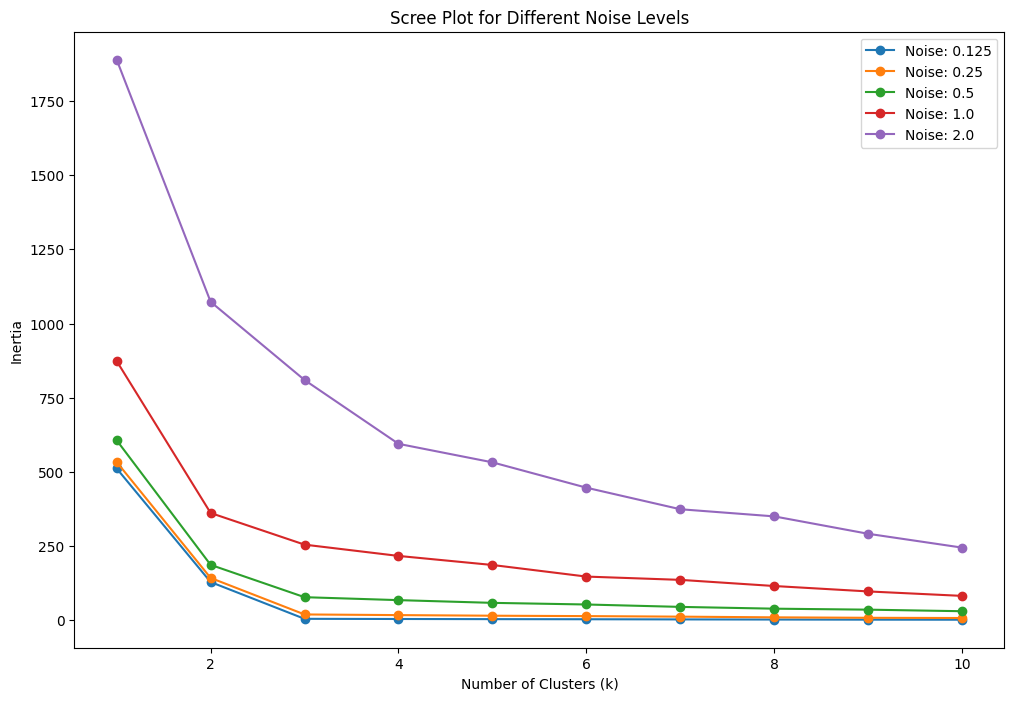

In [3]:
from sklearn.cluster import KMeans

def create_scree_plot(df, max_k=10):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[['x1', 'x2']])
        inertias.append(kmeans.inertia_)
    return inertias

plt.figure(figsize=(12, 8))

for noise, df in [(0.125, df0_125), (0.25, df0_25), (0.5, df0_5), (1.0, df1_0), (2.0, df2_0)]:
    inertias = create_scree_plot(df)
    plt.plot(range(1, 11), inertias, marker='o', label=f'Noise: {noise}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for Different Noise Levels')
plt.legend()

#The greater the noise level, the greater the inertia, and the harder it is to find a distinct elbow point and select a k.

The elbow is used to determine the best k, which can be determined at the crook of the elbow or the place where the SSE drops most significantly. After this point, the marginal beenfit of adding another cluster is small, so increasing k is not as necessary. FOr example, with the noise of 1, we can see a distinct dropoff point at k=2, so our optimal k would be at 2.

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [4]:
from google.colab import files
_ = files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [37]:
df['Beds'] = pd.to_numeric(df['Beds'], errors = 'coerce')
df['Price'] = df['Price'].str.replace(",", "").astype(float)
df['Review Scores Rating'] = pd.to_numeric(df['Review Scores Rating'], errors = 'coerce')
df['Number Of Reviews'] = pd.to_numeric(df['Number Of Reviews'], errors = 'coerce')

AttributeError: Can only use .str accessor with string values!

In [38]:
df = df.dropna(subset=['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'])

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[['Beds', 'Number Of Reviews', 'Review Scores Rating']]),
                             columns=['Beds', 'Number Of Reviews', 'Review Scores Rating'])

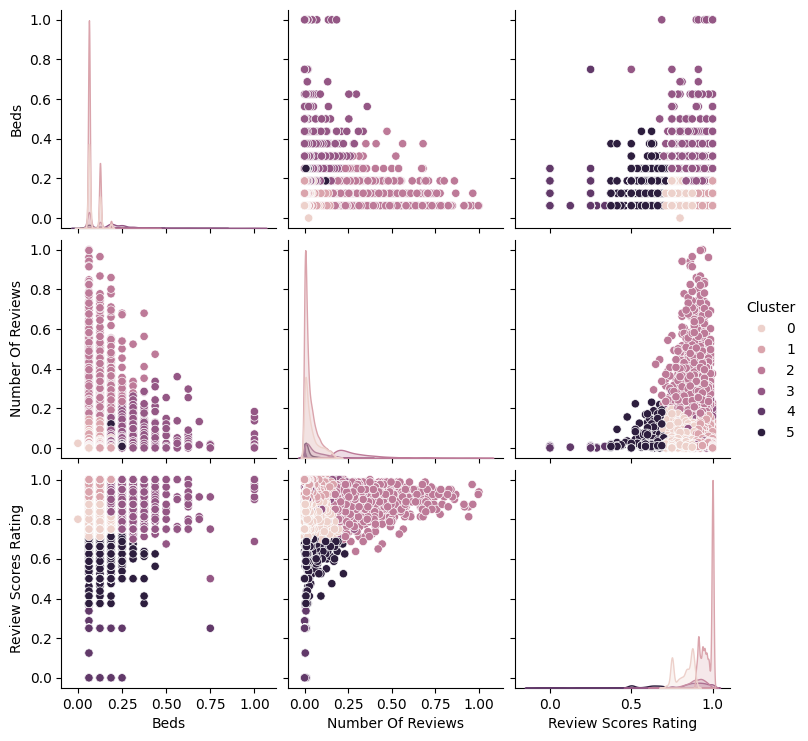

In [40]:
kmeans = KMeans(n_clusters=6, random_state=57)
df_norm['Cluster'] = kmeans.fit_predict(df_norm)

sns.pairplot(data=df_norm, hue='Cluster')

In [23]:
df['Cluster'] = df_norm['Cluster']
cluster_price = df.groupby('Cluster')['Price'].describe()
print(cluster_price)

          count        mean         std   min   25%    50%    75%     max
Cluster                                                                  
0.0      4636.0  157.044003  113.108993  10.0  86.0  130.0  195.0  2295.0
1.0      8757.0  156.852347  138.092231  24.0  89.0  130.0  190.0  5000.0
2.0      1745.0  164.959885  182.206266  29.0  88.0  130.0  199.0  5000.0
3.0      1351.0  160.921540  130.753343  27.0  89.0  138.0  199.0  2500.0
4.0        74.0  164.918919  213.178731  42.0  80.0  117.5  167.5  1499.0
5.0       627.0  153.398724  102.115313  22.0  85.0  135.0  195.0  1000.0


<ipython-input-32-2b815b8a1559>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


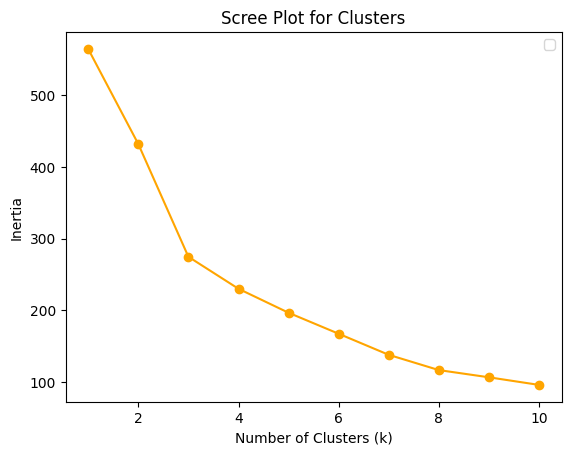

In [32]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=57)
    kmeans.fit(df_norm[['Beds', 'Number Of Reviews', 'Review Scores Rating']])
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker = 'o', color = 'orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for Clusters')
plt.legend()

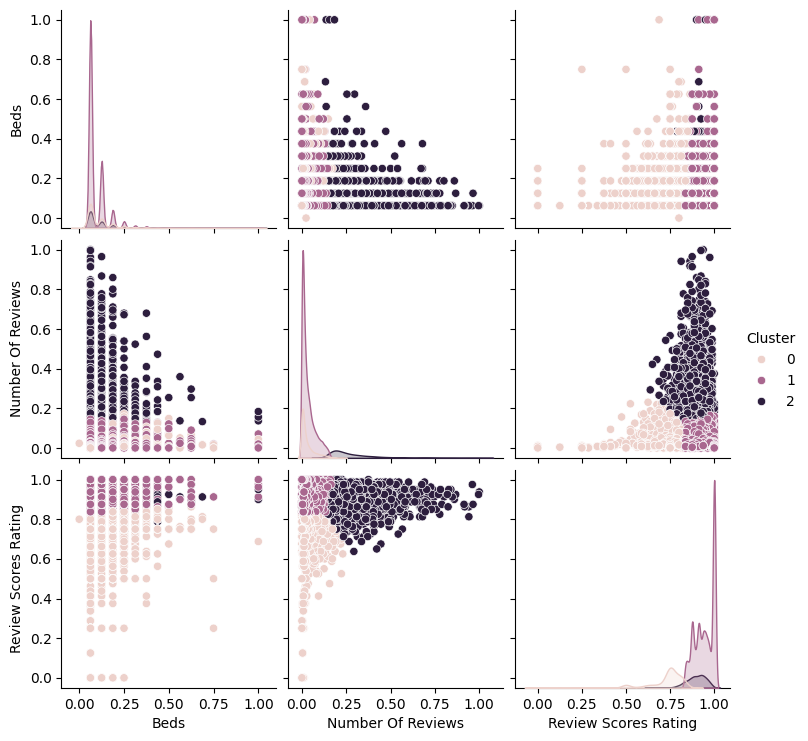

           count        mean         std   min   25%    50%    75%     max
Cluster                                                                   
0.0       2963.0  157.662167  114.992436  22.0  85.0  130.0  195.0  1499.0
1.0      12205.0  156.948955  133.188599  10.0  89.0  130.0  192.0  5000.0
2.0       2022.0  164.461919  174.399702  28.0  88.0  130.0  199.0  5000.0


In [36]:
kmeans_new = KMeans(n_clusters=3, random_state=57)
df_norm['Cluster'] = kmeans_new.fit_predict(df_norm[['Beds', 'Number Of Reviews', 'Review Scores Rating']])

sns.pairplot(df_norm, hue='Cluster')
plt.show()

df['Cluster'] = df_norm['Cluster']
new_cluster_prices = df.groupby('Cluster')['Price'].describe()
print(new_cluster_prices)